# 下载股票代码

In [1]:
import tushare as ts

token='a953fe53f83c71c6eb63558aa20d83d7cb5a9fdbe40cc6d49027a3ce'
ts.set_token(token)
pro=ts.pro_api()

stock_list = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
stock_list.head(20)

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国华网安,深圳,软件服务,19910114
3,000006.SZ,000006,深振业A,深圳,区域地产,19920427
4,000007.SZ,000007,*ST全新,深圳,其他商业,19920413
5,000008.SZ,000008,神州高铁,北京,运输设备,19920507
6,000009.SZ,000009,中国宝安,深圳,电气设备,19910625
7,000010.SZ,000010,美丽生态,深圳,建筑工程,19951027
8,000011.SZ,000011,深物业A,深圳,房产服务,19920330
9,000012.SZ,000012,南玻A,深圳,玻璃,19920228


In [2]:
stock_list.to_csv("stock_list.csv",  header=True, index=None)

# 读取股票代码并且显示

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('stock_list.csv',  sep=',', dtype = 'str') 
df.head()

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国华网安,深圳,软件服务,19910114
3,000006.SZ,000006,深振业A,深圳,区域地产,19920427
4,000007.SZ,000007,*ST全新,深圳,其他商业,19920413


# 查看股票数量

In [4]:
row_count_old = df.shape[0]
print( "row_count_old", row_count_old)

row_count_old 5364


# 20100101之前上市的股票

In [5]:
df_new = df[ df['list_date'] <= '20100101']
df_new.head()

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国华网安,深圳,软件服务,19910114
3,000006.SZ,000006,深振业A,深圳,区域地产,19920427
4,000007.SZ,000007,*ST全新,深圳,其他商业,19920413


# 20100101之前上市的股票的数量

In [6]:
row_count_new = df_new.shape[0]
print( "row_count_new", row_count_new)

row_count_new 1572


# 遴选10只股票代码（训练集）

In [7]:
import random

stock_list_00 = []

for i in range(10):
    one_num = random.randint(0,row_count_new)
    stock_list_00.append( df_new.iloc[one_num,0])
    
print(stock_list_00)

['000507.SZ', '002251.SZ', '000536.SZ', '000592.SZ', '000055.SZ', '002100.SZ', '002022.SZ', '000510.SZ', '600764.SH', '000063.SZ']


# 遴选10只股票代码（测试集）

In [8]:
import random

stock_list_01 = []

for i in range(10):
    one_num = random.randint(0,row_count_new)
    stock_list_01.append( df_new.iloc[one_num,0])
    
print(stock_list_01)

['002205.SZ', '600621.SH', '600992.SH', '600655.SH', '600965.SH', '300017.SZ', '600405.SH', '600657.SH', '600467.SH', '000789.SZ']


# 函数，下载一只股票的价格数据

In [9]:
import tushare as ts

def down_load_one_stock( stock_name, stock_file_name):
    token='a953fe53f83c71c6eb63558aa20d83d7cb5a9fdbe40cc6d49027a3ce'
    ts.set_token(token)
    pro=ts.pro_api()

    df = pro.query('daily', ts_code=stock_name, start_date='20100101', end_date='20230101')

    df.to_csv(stock_file_name)

# 函数，整理下载数据，适配PyAlgoTrade

In [10]:
from pyalgotrade.feed import csvfeed
import pandas as pd

#read_write_CSV
def read_write_CSV( from_file, to_file):
    feed = csvfeed.Feed("trade_date", "%Y%m%d")
    feed.addValuesFromCSV(from_file)

    df = pd.DataFrame(columns=['Date Time','Open','High','Low','Close','Volume','Adj Close'])
    file = open(to_file,"w") 
    file.write("Date Time,Open,High,Low,Close,Volume,Adj Close") 
    file.write("\n")
    for dateTime, value in feed:
        #print dateTime,value['open'],value['high'],value['low'],value['close'],value['vol'],value['close']
        strdatetime = dateTime.strftime("%Y-%m-%d %H:%M:%S") 
        file.write("%s,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f"%(strdatetime,
            value['open'],value['high'],value['low'],value['close'],value['vol'],value['close'])) 
        file.write("\n")

    file.close() 

# 下载训练集的股票价格数据，并且转换格式

In [11]:
for stock_name in stock_list_00:
    file_name = './' + stock_name + '.CSV'
    file_name_new='./' + stock_name + '_new.CSV'
    print("downloading ", stock_name,file_name,file_name_new)
    
    down_load_one_stock( stock_name, file_name)
    read_write_CSV(file_name, file_name_new)

downloading  000507.SZ ./000507.SZ.CSV ./000507.SZ_new.CSV
downloading  002251.SZ ./002251.SZ.CSV ./002251.SZ_new.CSV
downloading  000536.SZ ./000536.SZ.CSV ./000536.SZ_new.CSV
downloading  000592.SZ ./000592.SZ.CSV ./000592.SZ_new.CSV
downloading  000055.SZ ./000055.SZ.CSV ./000055.SZ_new.CSV
downloading  002100.SZ ./002100.SZ.CSV ./002100.SZ_new.CSV
downloading  002022.SZ ./002022.SZ.CSV ./002022.SZ_new.CSV
downloading  000510.SZ ./000510.SZ.CSV ./000510.SZ_new.CSV
downloading  600764.SH ./600764.SH.CSV ./600764.SH_new.CSV
downloading  000063.SZ ./000063.SZ.CSV ./000063.SZ_new.CSV


# 下载测试集的股票价格数据，并且转换格式

In [12]:
for stock_name in stock_list_01:
    file_name = './' + stock_name + '.CSV'
    file_name_new='./' + stock_name + '_new.CSV'
    print("downloading ", stock_name,file_name,file_name_new)
    
    down_load_one_stock( stock_name, file_name)
    read_write_CSV(file_name, file_name_new)

downloading  002205.SZ ./002205.SZ.CSV ./002205.SZ_new.CSV
downloading  600621.SH ./600621.SH.CSV ./600621.SH_new.CSV
downloading  600992.SH ./600992.SH.CSV ./600992.SH_new.CSV
downloading  600655.SH ./600655.SH.CSV ./600655.SH_new.CSV
downloading  600965.SH ./600965.SH.CSV ./600965.SH_new.CSV
downloading  300017.SZ ./300017.SZ.CSV ./300017.SZ_new.CSV
downloading  600405.SH ./600405.SH.CSV ./600405.SH_new.CSV
downloading  600657.SH ./600657.SH.CSV ./600657.SH_new.CSV
downloading  600467.SH ./600467.SH.CSV ./600467.SH_new.CSV
downloading  000789.SZ ./000789.SZ.CSV ./000789.SZ_new.CSV


# 函数，可视化价格数据

In [13]:
def show_one_stock(file_name):
    df = pd.read_csv(file_name, parse_dates=['Date Time'], index_col=['Date Time'], sep=',') 
    plots = df[['Close']].plot(subplots=False, figsize=(8, 3))
    plt.show()


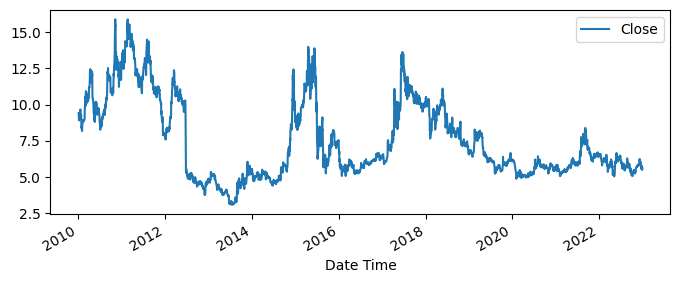

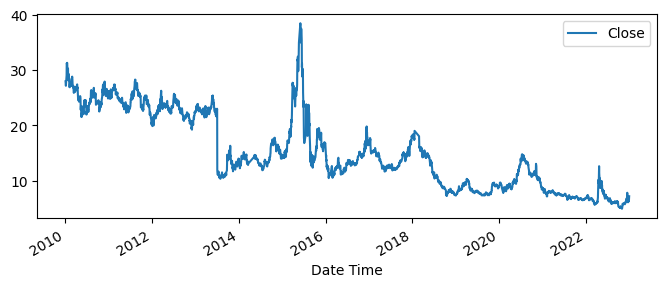

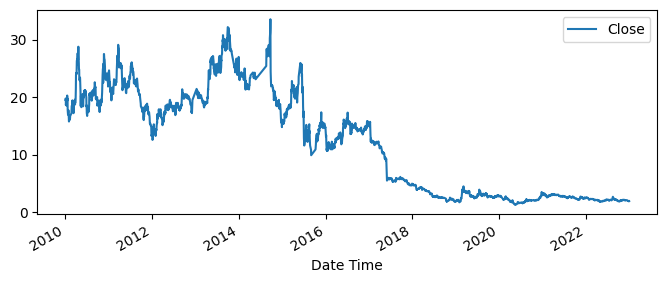

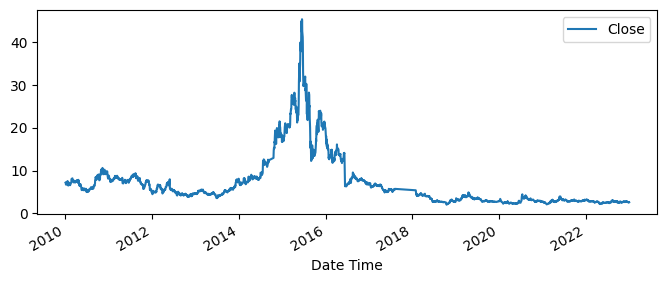

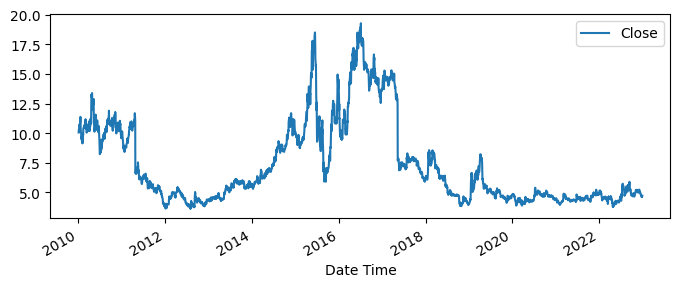

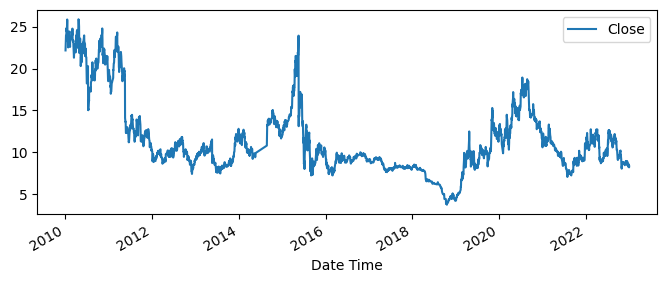

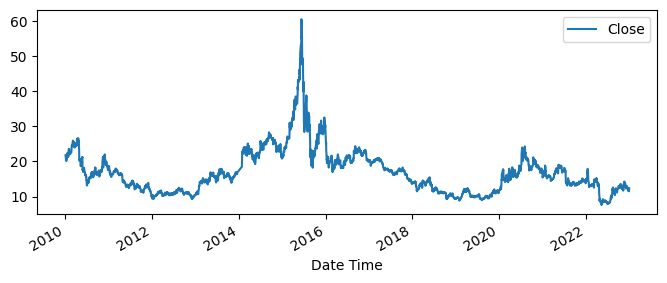

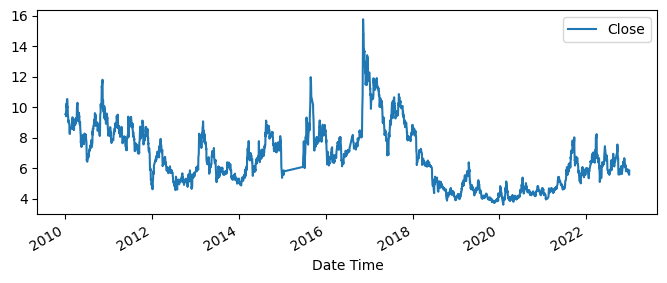

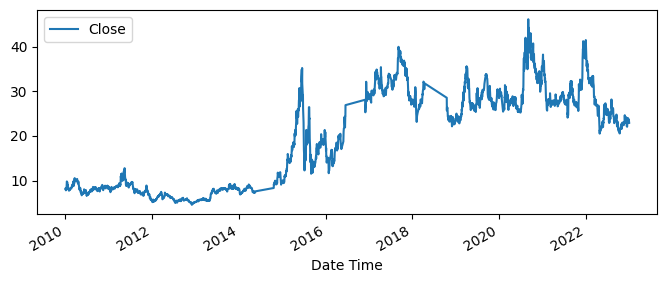

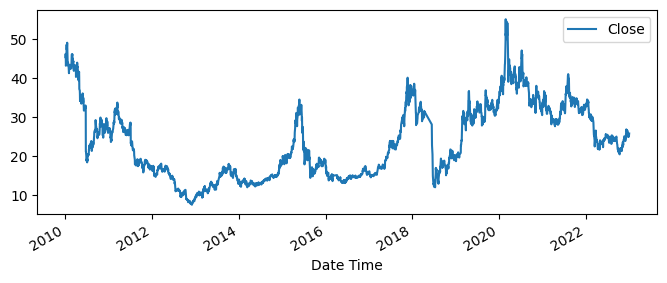

In [14]:
for stock_name in stock_list_00:
    file_name_new='./' + stock_name + '_new.CSV'
    show_one_stock(file_name_new)

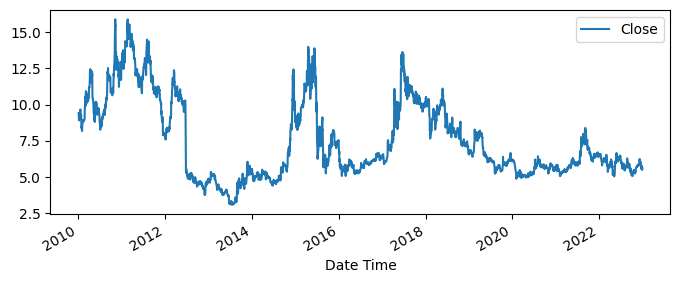

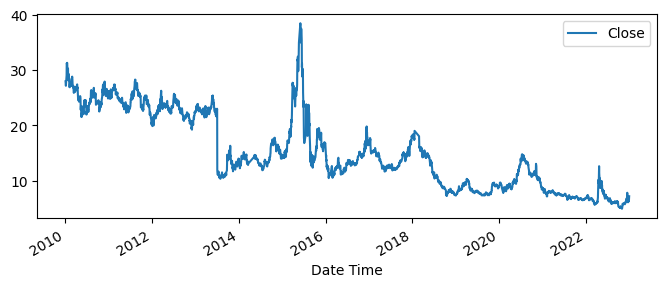

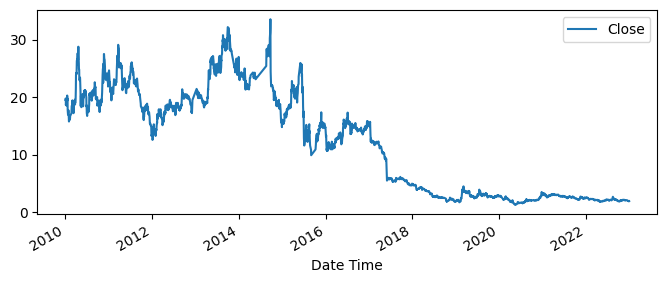

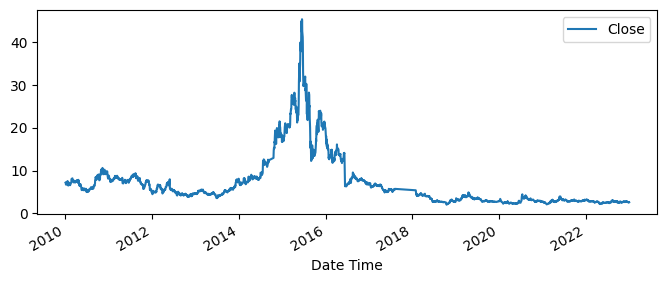

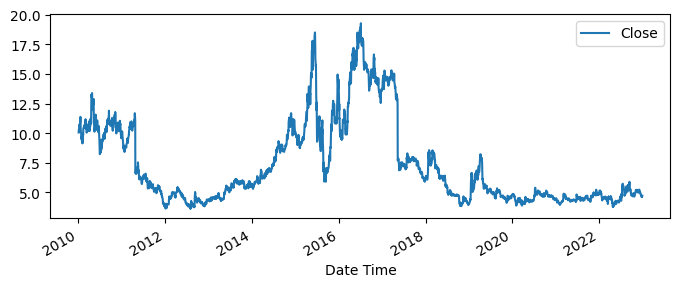

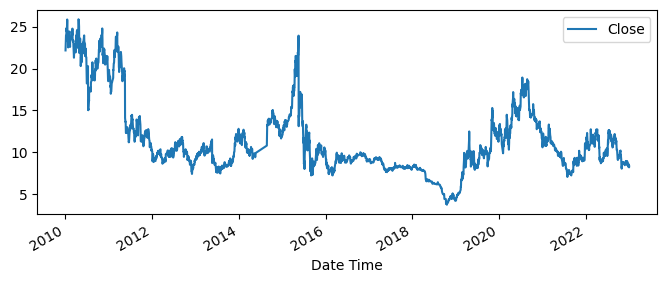

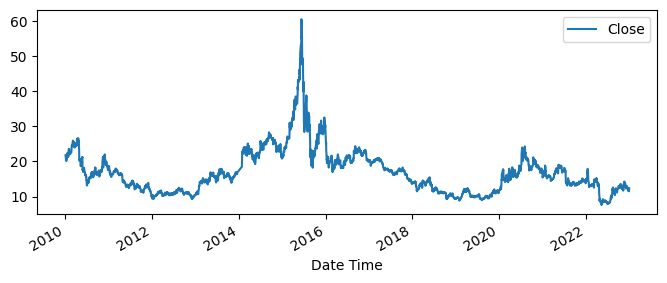

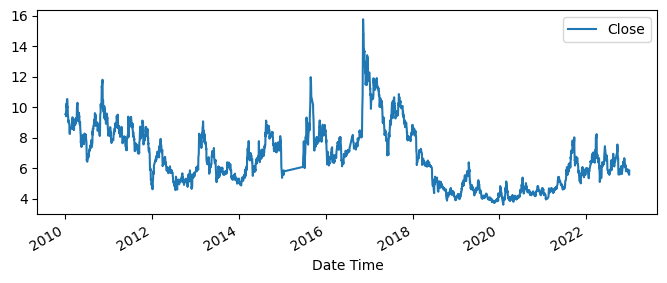

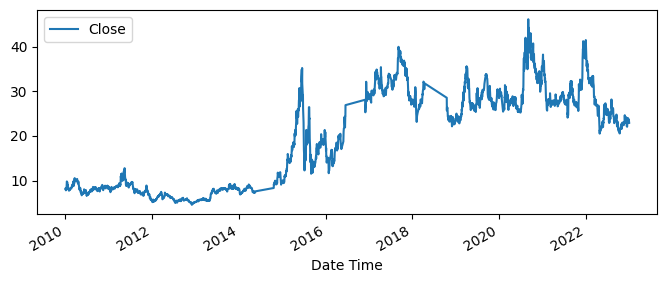

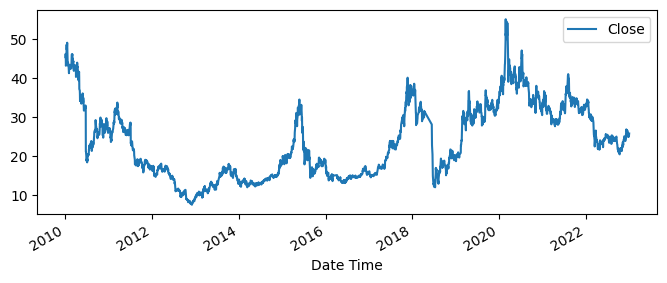

In [15]:
for stock_name in stock_list_00:
    file_name_new='./' + stock_name + '_new.CSV'
    show_one_stock(file_name_new)

# 装载stock01.csv

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

#装载数据集

df = pd.read_csv('stock01.csv', parse_dates=['Date Time'], index_col=['Date Time'], sep=',') 
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date Time,,,,,,
2010-01-04,26.99,27.18,26.35,26.96,17902.49,26.96
2010-01-05,26.88,28.01,26.75,28.01,31438.24,28.01
2010-01-06,27.98,29.19,27.81,28.66,33094.95,28.66
2010-01-07,28.48,28.90,27.21,27.30,23864.32,27.30
2010-01-08,27.00,27.29,26.65,27.20,15488.45,27.20


# 计算短周期和长周期的移动平均，并且可视化

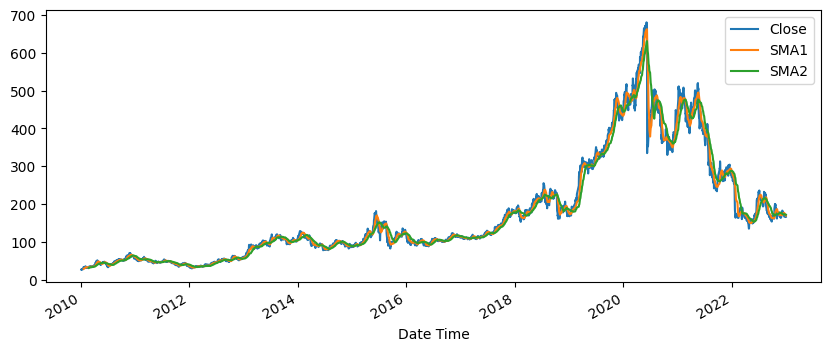

In [17]:
import numpy as np

#计算短周期的moving average
#计算长周期的moving average

short_term =13
long_term = 33

df['SMA1'] = df.Close.rolling(short_term).mean()
df['SMA2'] = df.Close.rolling(long_term).mean() 

#可视化close, SMA1,SMA2
plots = df[['Close', 'SMA1', 'SMA2']].plot(subplots=False, figsize=(10, 4))
plt.show()

In [18]:
#删除Adj Close列
#其他列，后面计算其他指标用到

del df['Adj Close']
df.head()

,Open,High,Low,Close,Volume,SMA1,SMA2
Date Time,,,,,,,
2010-01-04,26.99,27.18,26.35,26.96,17902.49,NaN,NaN
2010-01-05,26.88,28.01,26.75,28.01,31438.24,NaN,NaN
2010-01-06,27.98,29.19,27.81,28.66,33094.95,NaN,NaN
2010-01-07,28.48,28.90,27.21,27.30,23864.32,NaN,NaN
2010-01-08,27.00,27.29,26.65,27.20,15488.45,NaN,NaN


# 构造一个新的数据列signal

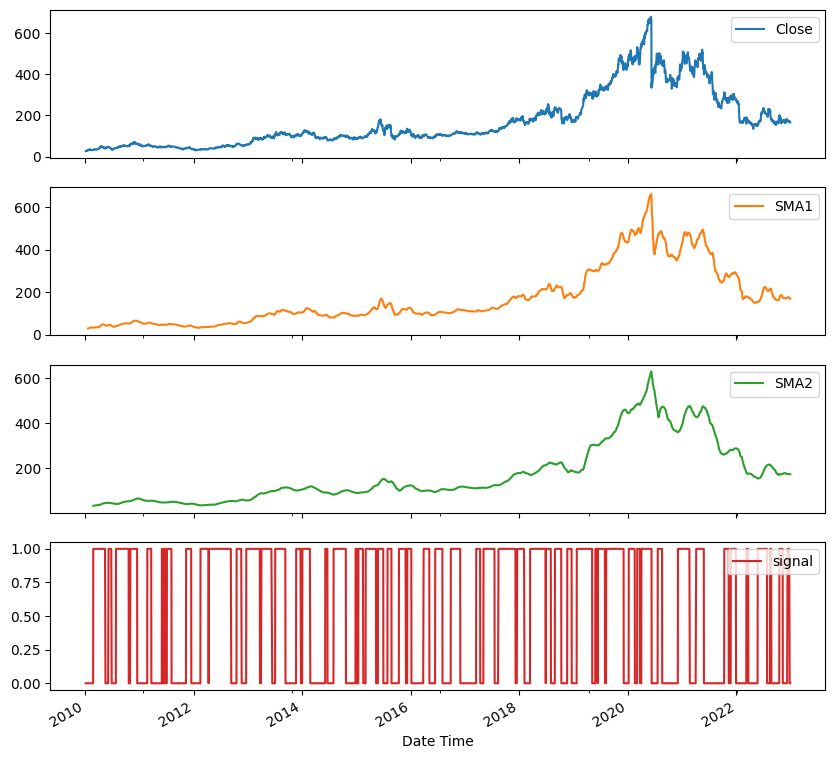

In [19]:
#构造一个新的数据列signal

df['signal'] = np.where(df['SMA1'] >df['SMA2'], 1.0, 0.0)
plots = df[['Close', 'SMA1', 'SMA2',  "signal"]].plot(subplots=True, figsize=(10, 10))
plt.show()

# 展示Close、SMA1、SMA2、signal等数据列的部分数据

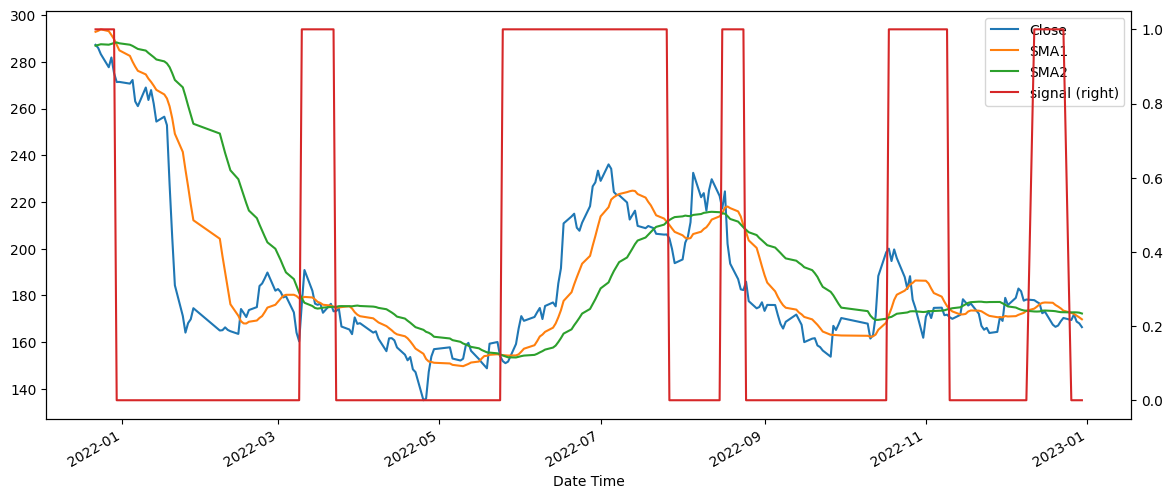

In [20]:
#展示Close、SMA1、SMA2、signal等数据列的部分数据
df[['Close', 'SMA1', 'SMA2',  "signal"]].iloc[-250:].plot(figsize=(14,6),secondary_y=['signal'])
plt.show()

# 开始构造Signal

In [21]:
row_count = df.shape[0]
print("row_count", row_count)

row_count 3106


In [22]:
df.head()

,Open,High,Low,Close,Volume,SMA1,SMA2,signal
Date Time,,,,,,,,
2010-01-04,26.99,27.18,26.35,26.96,17902.49,NaN,NaN,0.0
2010-01-05,26.88,28.01,26.75,28.01,31438.24,NaN,NaN,0.0
2010-01-06,27.98,29.19,27.81,28.66,33094.95,NaN,NaN,0.0
2010-01-07,28.48,28.90,27.21,27.30,23864.32,NaN,NaN,0.0
2010-01-08,27.00,27.29,26.65,27.20,15488.45,NaN,NaN,0.0


In [23]:
#range(1,6) --> 1,2,3,4,5

# rows count:    3106
# index:         0 - 3105
# i:             1 - 3105

for i in range(1,3106):
    row_index = df.index[i]
    row_index_last = df.index[i-1]
    
    if df.loc[row_index,'signal'] ==0 and df.loc[row_index_last,'signal'] ==0:
        df.loc[row_index,'Signal'] = 0
    if df.loc[row_index,'signal'] ==1 and df.loc[row_index_last,'signal'] ==1:
        df.loc[row_index,'Signal'] = 0

    if df.loc[row_index,'signal'] ==1 and df.loc[row_index_last,'signal'] ==0:
        df.loc[row_index,'Signal'] = 1
    if df.loc[row_index,'signal'] ==0 and df.loc[row_index_last,'signal'] ==1:
        df.loc[row_index,'Signal'] = -1

In [24]:
df.head()

,Open,High,Low,Close,Volume,SMA1,SMA2,signal,Signal
Date Time,,,,,,,,,
2010-01-04,26.99,27.18,26.35,26.96,17902.49,NaN,NaN,0.0,NaN
2010-01-05,26.88,28.01,26.75,28.01,31438.24,NaN,NaN,0.0,0.0
2010-01-06,27.98,29.19,27.81,28.66,33094.95,NaN,NaN,0.0,0.0
2010-01-07,28.48,28.90,27.21,27.30,23864.32,NaN,NaN,0.0,0.0
2010-01-08,27.00,27.29,26.65,27.20,15488.45,NaN,NaN,0.0,0.0


In [25]:
df.tail()

,Open,High,Low,Close,Volume,SMA1,SMA2,signal,Signal
Date Time,,,,,,,,,
2022-12-26,170.37,171.00,167.67,169.50,28268.25,172.563077,172.755758,0.0,-1.0
2022-12-27,170.52,172.10,168.17,171.90,44563.87,172.111538,172.791818,0.0,0.0
2022-12-28,171.70,171.70,168.15,168.82,39264.55,171.384615,172.756061,0.0,0.0
2022-12-29,168.00,171.01,167.25,168.07,51904.44,170.621538,172.646364,0.0,0.0
2022-12-30,167.98,170.67,165.52,166.45,47141.82,169.793846,172.284848,0.0,0.0


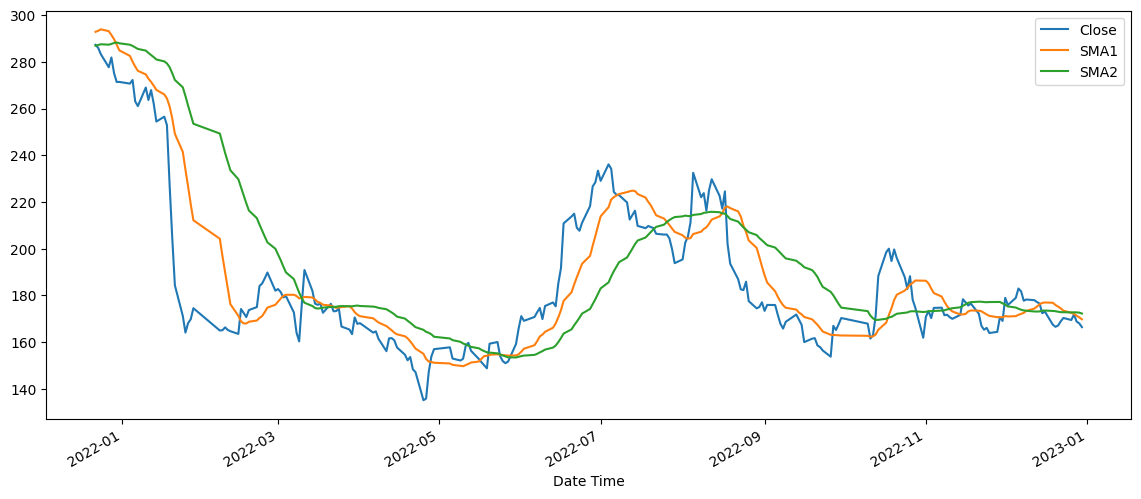

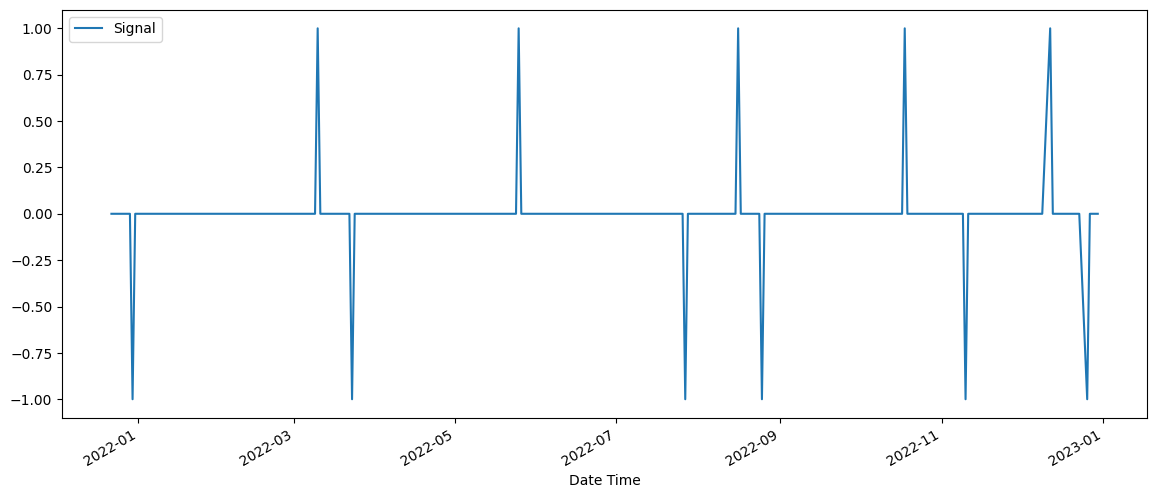

In [26]:
df[['Close', 'SMA1', 'SMA2']].iloc[-250:].plot(figsize=(14,6))
plt.show()

df[['Signal']].iloc[-250:].plot(figsize=(14,6))
plt.show()

In [27]:
del df['signal']
df.head()

,Open,High,Low,Close,Volume,SMA1,SMA2,Signal
Date Time,,,,,,,,
2010-01-04,26.99,27.18,26.35,26.96,17902.49,NaN,NaN,NaN
2010-01-05,26.88,28.01,26.75,28.01,31438.24,NaN,NaN,0.0
2010-01-06,27.98,29.19,27.81,28.66,33094.95,NaN,NaN,0.0
2010-01-07,28.48,28.90,27.21,27.30,23864.32,NaN,NaN,0.0
2010-01-08,27.00,27.29,26.65,27.20,15488.45,NaN,NaN,0.0


In [28]:
df.tail()

,Open,High,Low,Close,Volume,SMA1,SMA2,Signal
Date Time,,,,,,,,
2022-12-26,170.37,171.00,167.67,169.50,28268.25,172.563077,172.755758,-1.0
2022-12-27,170.52,172.10,168.17,171.90,44563.87,172.111538,172.791818,0.0
2022-12-28,171.70,171.70,168.15,168.82,39264.55,171.384615,172.756061,0.0
2022-12-29,168.00,171.01,167.25,168.07,51904.44,170.621538,172.646364,0.0
2022-12-30,167.98,170.67,165.52,166.45,47141.82,169.793846,172.284848,0.0


# 特征构造与样本生成

In [29]:
#构造差分DIFF_1

import numpy as np

df['DIFF_1'] = df["Close"].diff()
df.head()

,Open,High,Low,Close,Volume,SMA1,SMA2,Signal,DIFF_1
Date Time,,,,,,,,,
2010-01-04,26.99,27.18,26.35,26.96,17902.49,NaN,NaN,NaN,NaN
2010-01-05,26.88,28.01,26.75,28.01,31438.24,NaN,NaN,0.0,1.05
2010-01-06,27.98,29.19,27.81,28.66,33094.95,NaN,NaN,0.0,0.65
2010-01-07,28.48,28.90,27.21,27.30,23864.32,NaN,NaN,0.0,-1.36
2010-01-08,27.00,27.29,26.65,27.20,15488.45,NaN,NaN,0.0,-0.10


In [30]:
#构造差分DIFF_2,DIFF_3

df['DIFF_2'] = df["DIFF_1"].shift(1)
df['DIFF_3'] = df["DIFF_2"].shift(1)

df.head()

,Open,High,Low,Close,Volume,SMA1,SMA2,Signal,DIFF_1,DIFF_2,DIFF_3
Date Time,,,,,,,,,,,
2010-01-04,26.99,27.18,26.35,26.96,17902.49,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,26.88,28.01,26.75,28.01,31438.24,NaN,NaN,0.0,1.05,NaN,NaN
2010-01-06,27.98,29.19,27.81,28.66,33094.95,NaN,NaN,0.0,0.65,1.05,NaN
2010-01-07,28.48,28.90,27.21,27.30,23864.32,NaN,NaN,0.0,-1.36,0.65,1.05
2010-01-08,27.00,27.29,26.65,27.20,15488.45,NaN,NaN,0.0,-0.10,-1.36,0.65


In [31]:
#构造技术指标

import talib as ta
import talib


df['MA13']=ta.MA(df.Close,timeperiod=13)
df['MA33']=ta.MA(df.Close,timeperiod=33)
df['MA13_MA33'] = df['MA13']- df['MA33']

df['EMA10']=ta.EMA(df.Close,timeperiod=10)
df['EMA30']=ta.EMA(df.Close,timeperiod=30)
df['EMA10_EMA30'] = df['EMA10']- df['EMA30']
    
df['MOM10']=ta.MOM(df.Close,timeperiod=10)
df['MOM30']=ta.MOM(df.Close,timeperiod=30)
df['MOM10_MOM30'] = df['MOM10']- df['MOM30']
    
df['RSI10']=ta.RSI(df.Close,timeperiod=10)
df['RSI30']=ta.RSI(df.Close,timeperiod=30)

df['K10'],df['D10']=ta.STOCH(df.High,df.Low,df.Close, fastk_period=10)
df['K10_D10'] = df['K10']- df['D10']

df['K30'],df['D30']=ta.STOCH(df.High,df.Low,df.Close, fastk_period=30)
df['K30_D30'] = df['K30']- df['D30']

df.head()

,Open,High,Low,Close,Volume,SMA1,SMA2,Signal,DIFF_1,DIFF_2,...,MOM30,MOM10_MOM30,RSI10,RSI30,K10,D10,K10_D10,K30,D30,K30_D30
Date Time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,26.99,27.18,26.35,26.96,17902.49,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,26.88,28.01,26.75,28.01,31438.24,NaN,NaN,0.0,1.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,27.98,29.19,27.81,28.66,33094.95,NaN,NaN,0.0,0.65,1.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,28.48,28.90,27.21,27.30,23864.32,NaN,NaN,0.0,-1.36,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,27.00,27.29,26.65,27.20,15488.45,NaN,NaN,0.0,-0.10,-1.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_show = df.iloc[0:35]
df_show.head(35)

,Open,High,Low,Close,Volume,SMA1,SMA2,Signal,DIFF_1,DIFF_2,...,MOM30,MOM10_MOM30,RSI10,RSI30,K10,D10,K10_D10,K30,D30,K30_D30
Date Time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,26.99,27.18,26.35,26.96,17902.49,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,26.88,28.01,26.75,28.01,31438.24,NaN,NaN,0.0,1.05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,27.98,29.19,27.81,28.66,33094.95,NaN,NaN,0.0,0.65,1.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,28.48,28.90,27.21,27.30,23864.32,NaN,NaN,0.0,-1.36,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,27.00,27.29,26.65,27.20,15488.45,NaN,NaN,0.0,-0.10,-1.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,27.28,28.00,27.01,27.46,12230.39,NaN,NaN,0.0,0.26,-0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,27.51,28.80,27.50,28.59,18566.95,NaN,NaN,0.0,1.13,0.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-13,28.00,29.37,27.90,28.95,28220.53,NaN,NaN,0.0,0.36,1.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-14,29.15,29.33,28.63,28.92,18326.84,NaN,NaN,0.0,-0.03,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


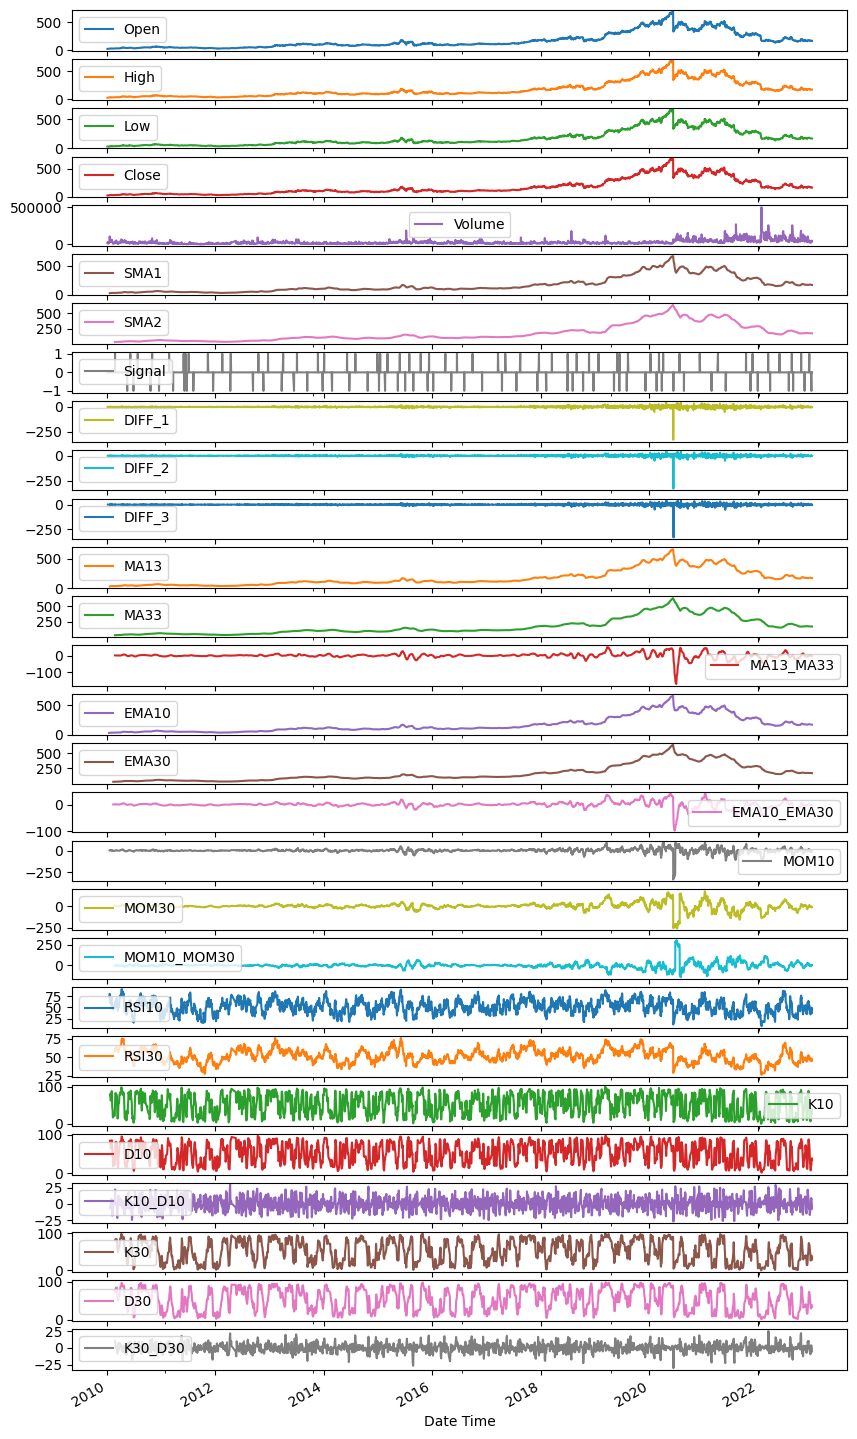

In [33]:
#数据可视化

plots = df.plot(subplots=True, figsize=(10, 20))
plt.show()

In [34]:
df2=df.copy()

df_show = df2.iloc[32:35]
df_show.head()

,Open,High,Low,Close,Volume,SMA1,SMA2,Signal,DIFF_1,DIFF_2,...,MOM30,MOM10_MOM30,RSI10,RSI30,K10,D10,K10_D10,K30,D30,K30_D30
Date Time,,,,,,,,,,,,,,,,,,,,,
2010-02-24,33.43,35.16,33.21,34.41,40094.66,32.923077,31.395152,1.0,0.59,2.24,...,5.75,-4.54,61.703400,61.698536,52.750840,37.161652,15.589188,NaN,NaN,NaN
2010-02-25,34.43,34.98,34.01,34.80,25289.64,32.869231,31.632727,0.0,0.39,0.59,...,7.50,-6.30,63.304972,62.203006,78.027101,55.961813,22.065288,81.239000,71.401810,9.837190
2010-02-26,34.68,35.66,34.27,34.60,16555.44,32.800769,31.832424,0.0,-0.20,0.39,...,7.40,-4.70,61.831576,61.771391,82.580077,71.119339,11.460737,83.773087,78.305684,5.467404


In [35]:

df2=df2.dropna()
df2.head()

,Open,High,Low,Close,Volume,SMA1,SMA2,Signal,DIFF_1,DIFF_2,...,MOM30,MOM10_MOM30,RSI10,RSI30,K10,D10,K10_D10,K30,D30,K30_D30
Date Time,,,,,,,,,,,,,,,,,,,,,
2010-02-25,34.43,34.98,34.01,34.80,25289.64,32.869231,31.632727,0.0,0.39,0.59,...,7.50,-6.30,63.304972,62.203006,78.027101,55.961813,22.065288,81.239000,71.401810,9.837190
2010-02-26,34.68,35.66,34.27,34.60,16555.44,32.800769,31.832424,0.0,-0.20,0.39,...,7.40,-4.70,61.831576,61.771391,82.580077,71.119339,11.460737,83.773087,78.305684,5.467404
2010-03-01,34.60,34.90,33.90,34.59,25541.90,32.907692,32.012121,0.0,-0.01,-0.20,...,7.13,-3.74,61.751729,61.749229,82.672326,81.093168,1.579159,83.875622,82.962570,0.913052
2010-03-02,34.50,35.60,34.50,34.89,23571.77,33.006923,32.242121,0.0,0.30,-0.01,...,6.30,-2.43,63.330196,62.170439,79.614098,81.622167,-2.008069,83.534038,83.727582,-0.193544
2010-03-03,34.85,35.18,34.13,34.92,22607.53,33.239231,32.476061,0.0,0.03,0.30,...,5.97,-3.27,63.497576,62.213483,81.133314,81.139913,-0.006599,84.229512,83.879724,0.349788


In [36]:
#删除SMA1列和SMA2列
 
del df2['SMA1']
del df2['SMA2']

df2.head()

,Open,High,Low,Close,Volume,Signal,DIFF_1,DIFF_2,DIFF_3,MA13,...,MOM30,MOM10_MOM30,RSI10,RSI30,K10,D10,K10_D10,K30,D30,K30_D30
Date Time,,,,,,,,,,,,,,,,,,,,,
2010-02-25,34.43,34.98,34.01,34.80,25289.64,0.0,0.39,0.59,2.24,32.869231,...,7.50,-6.30,63.304972,62.203006,78.027101,55.961813,22.065288,81.239000,71.401810,9.837190
2010-02-26,34.68,35.66,34.27,34.60,16555.44,0.0,-0.20,0.39,0.59,32.800769,...,7.40,-4.70,61.831576,61.771391,82.580077,71.119339,11.460737,83.773087,78.305684,5.467404
2010-03-01,34.60,34.90,33.90,34.59,25541.90,0.0,-0.01,-0.20,0.39,32.907692,...,7.13,-3.74,61.751729,61.749229,82.672326,81.093168,1.579159,83.875622,82.962570,0.913052
2010-03-02,34.50,35.60,34.50,34.89,23571.77,0.0,0.30,-0.01,-0.20,33.006923,...,6.30,-2.43,63.330196,62.170439,79.614098,81.622167,-2.008069,83.534038,83.727582,-0.193544
2010-03-03,34.85,35.18,34.13,34.92,22607.53,0.0,0.03,0.30,-0.01,33.239231,...,5.97,-3.27,63.497576,62.213483,81.133314,81.139913,-0.006599,84.229512,83.879724,0.349788


Open           0.002234
High           0.002540
Low            0.003108
Close          0.003505
Volume        -0.013909
Signal         1.000000
DIFF_1         0.026278
DIFF_2         0.080657
DIFF_3         0.042868
MA13          -0.010797
MA33          -0.011893
MA13_MA33      0.009121
EMA10         -0.006367
EMA30         -0.009583
EMA10_EMA30    0.036809
MOM10          0.110989
MOM30          0.012343
MOM10_MOM30    0.067571
RSI10          0.132643
RSI30          0.057566
K10            0.140037
D10            0.148402
K10_D10       -0.006431
K30            0.122927
D30            0.094918
K30_D30        0.141281
Name: Signal, dtype: float64


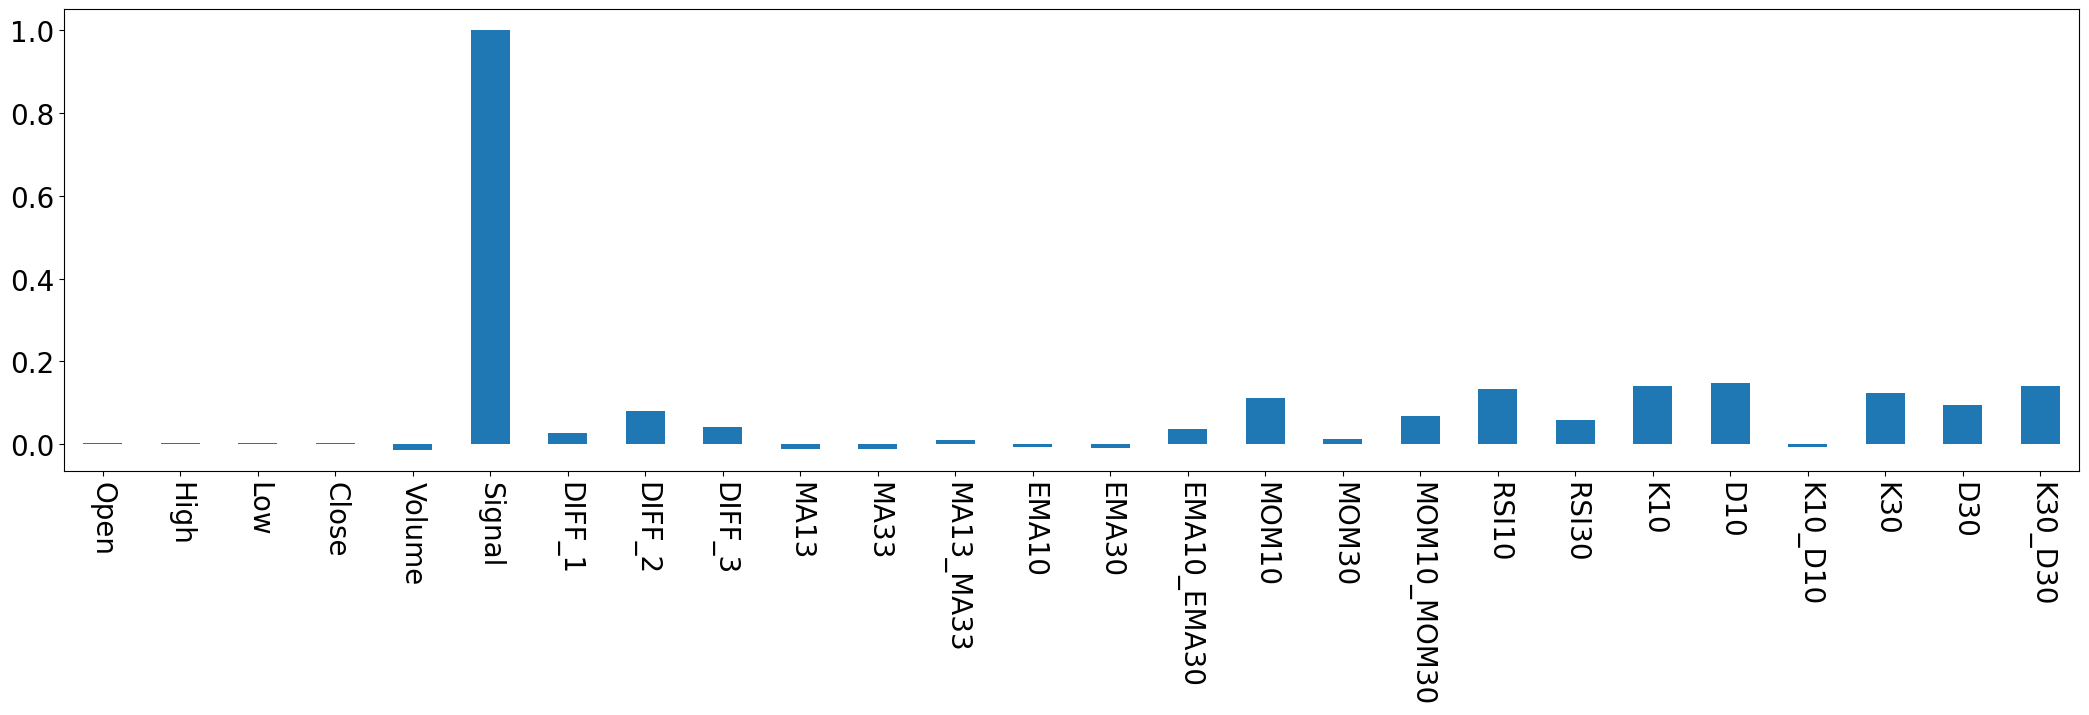

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import seaborn as sb
corr = df2.corr()

corr = corr['Signal']
print(corr)

plt.rcParams.update({'font.size': 20}) # must set in top
ax = corr.plot.bar(rot=0,figsize=(26,6))
plt.xticks(rotation=270)
plt.show()

# 训练机器学习模型，并且存盘

In [38]:
row_count = df2.shape[0]
print("row_count", row_count)

row_count 3073


In [39]:

X = df2.copy()
del X['Signal']
X.head()


,Open,High,Low,Close,Volume,DIFF_1,DIFF_2,DIFF_3,MA13,MA33,...,MOM30,MOM10_MOM30,RSI10,RSI30,K10,D10,K10_D10,K30,D30,K30_D30
Date Time,,,,,,,,,,,,,,,,,,,,,
2010-02-25,34.43,34.98,34.01,34.80,25289.64,0.39,0.59,2.24,32.869231,31.632727,...,7.50,-6.30,63.304972,62.203006,78.027101,55.961813,22.065288,81.239000,71.401810,9.837190
2010-02-26,34.68,35.66,34.27,34.60,16555.44,-0.20,0.39,0.59,32.800769,31.832424,...,7.40,-4.70,61.831576,61.771391,82.580077,71.119339,11.460737,83.773087,78.305684,5.467404
2010-03-01,34.60,34.90,33.90,34.59,25541.90,-0.01,-0.20,0.39,32.907692,32.012121,...,7.13,-3.74,61.751729,61.749229,82.672326,81.093168,1.579159,83.875622,82.962570,0.913052
2010-03-02,34.50,35.60,34.50,34.89,23571.77,0.30,-0.01,-0.20,33.006923,32.242121,...,6.30,-2.43,63.330196,62.170439,79.614098,81.622167,-2.008069,83.534038,83.727582,-0.193544
2010-03-03,34.85,35.18,34.13,34.92,22607.53,0.03,0.30,-0.01,33.239231,32.476061,...,5.97,-3.27,63.497576,62.213483,81.133314,81.139913,-0.006599,84.229512,83.879724,0.349788


In [40]:
print( X.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'DIFF_1', 'DIFF_2', 'DIFF_3',
       'MA13', 'MA33', 'MA13_MA33', 'EMA10', 'EMA30', 'EMA10_EMA30', 'MOM10',
       'MOM30', 'MOM10_MOM30', 'RSI10', 'RSI30', 'K10', 'D10', 'K10_D10',
       'K30', 'D30', 'K30_D30'],
      dtype='object')


In [41]:
y = df2['Signal'].copy()
y.head()

Date Time
2010-02-25    0.0
2010-02-26    0.0
2010-03-01    0.0
2010-03-02    0.0
2010-03-03    0.0
Name: Signal, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

n_estimators=100
model = RandomForestClassifier(n_estimators,random_state=0, n_jobs=-1)
fit = model.fit(X_train,y_train)

In [44]:
# feature importance
df_ret = pd.DataFrame(model.feature_importances_,index=X.columns, columns=['RandForest_Importance'])
print( df_ret)

             RandForest_Importance
Open                      0.018792
High                      0.022252
Low                       0.025403
Close                     0.021542
Volume                    0.040131
DIFF_1                    0.032171
DIFF_2                    0.033364
DIFF_3                    0.038304
MA13                      0.018341
MA33                      0.021867
MA13_MA33                 0.179014
EMA10                     0.023784
EMA30                     0.018916
EMA10_EMA30               0.044353
MOM10                     0.037527
MOM30                     0.043537
MOM10_MOM30               0.063707
RSI10                     0.041138
RSI30                     0.033988
K10                       0.033972
D10                       0.040262
K10_D10                   0.033202
K30                       0.046557
D30                       0.040269
K30_D30                   0.047605


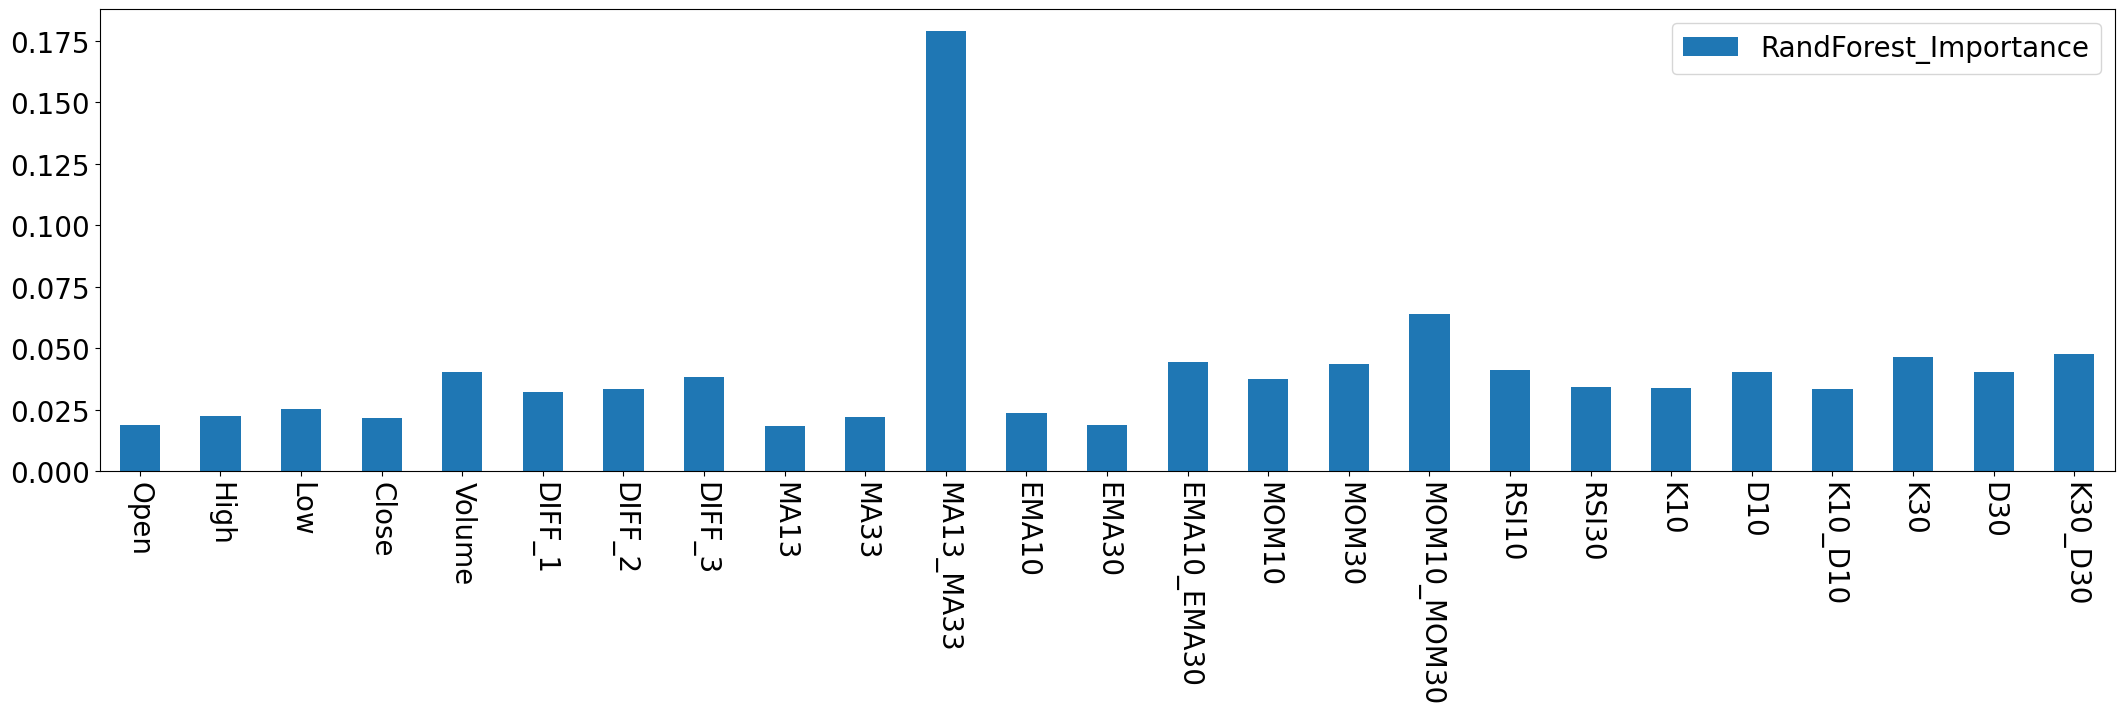

In [45]:
plt.rcParams.update({'font.size': 20}) # must set in top
ax = df_ret.plot.bar(rot=0,figsize=(26,6))
plt.xticks(rotation=270)
plt.show()

# hyper parameter tuning 

In [46]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [None, 10, 20,30,40,50] }

# Initialize the Random Forest classifier
rfClassifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
gs_rfClassifier = GridSearchCV(estimator=rfClassifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

model = gs_rfClassifier
# Fit model
model.fit(X_train, y_train)

# Best parameters
best_params = model.best_params_
print( best_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   34.8s finished


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}


In [47]:
y_train_predict = model.predict(X_train)

In [48]:
print("y_train_predict",y_train_predict)
print(y_train_predict.shape)

y_train_predict [0. 0. 0. ... 0. 0. 0.]
(2458,)


In [49]:
print("y_train.values",y_train.values)
print( y_train.values.shape)

y_train.values [0. 0. 0. ... 0. 0. 0.]
(2458,)


In [50]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_train.values,y_train_predict)
print("score train", score)

score train 1.0


In [51]:
def count_occurrences(mylist, target):
    return sum(1 for item in mylist if item == target)

print("-1 count", count_occurrences(y_train.values,-1))
print("0 count", count_occurrences(y_train.values,0))
print("1 count", count_occurrences(y_train.values,1))

-1 count 46
0 count 2368
1 count 44


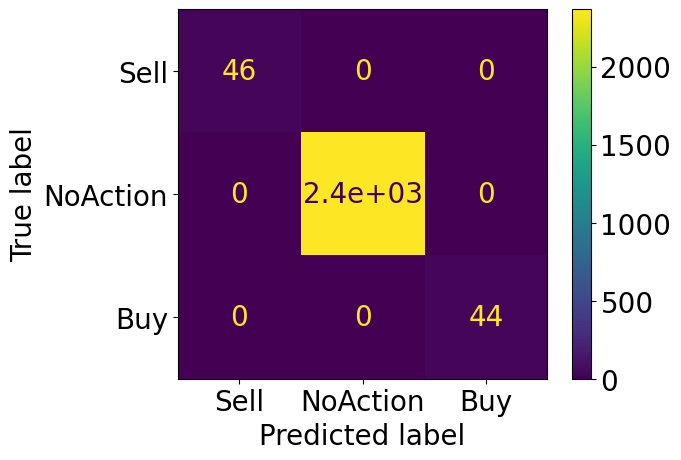

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_train.values, y_train_predict)
classes = ["Sell", "NoAction", "Buy"]           
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes).plot();


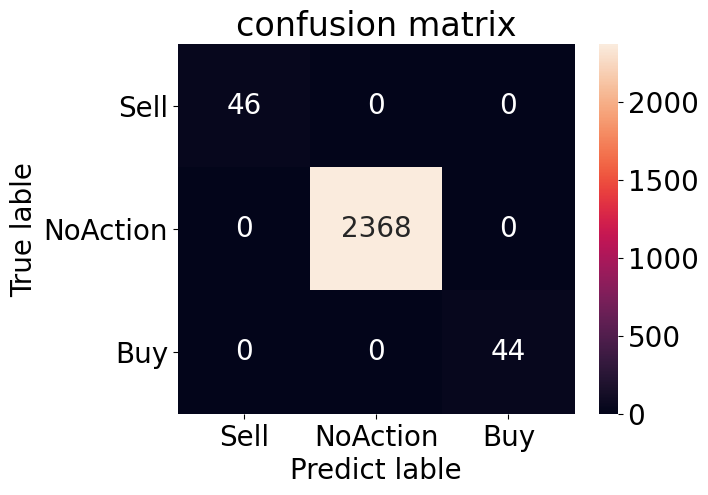

In [53]:
# confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt
labels=["Sell", "NoAction", "Buy"]
sns.heatmap(cm,annot=True ,fmt="d",xticklabels=labels,yticklabels=labels)
plt.title('confusion matrix')  # 标题
plt.xlabel('Predict lable')  # x轴
plt.ylabel('True lable')  # y轴
plt.show()

In [54]:
# 计算每个类别的精度和召回率
from sklearn.metrics import classification_report
target_names = ['Sell', 'No Action', 'Buy']
print(classification_report(y_train.values, y_train_predict, target_names=target_names))
        

              precision    recall  f1-score   support

        Sell       1.00      1.00      1.00        46
   No Action       1.00      1.00      1.00      2368
         Buy       1.00      1.00      1.00        44

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458



In [55]:
#on test set
y_test_predict = model.predict(X_test)

print("y_test_predict",y_test_predict)
print(y_test_predict.shape)

print("y_test.values",y_test.values)
print( y_test.values.shape)

score = accuracy_score(y_test.values,y_test_predict)
print("score test", score)



y_test_predict [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

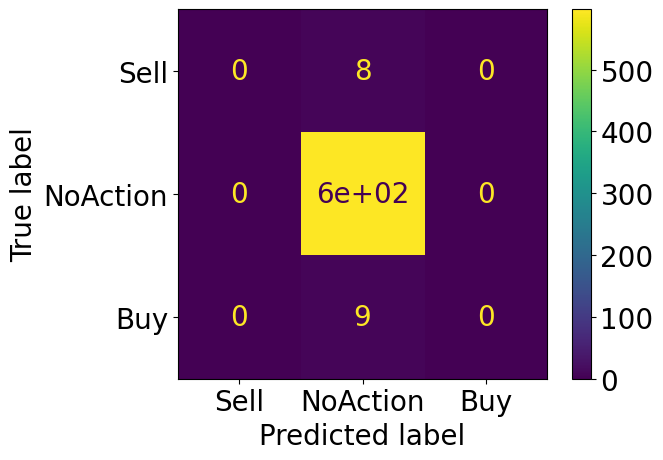

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test.values, y_test_predict)
classes = ["Sell", "NoAction", "Buy"]           
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes).plot();


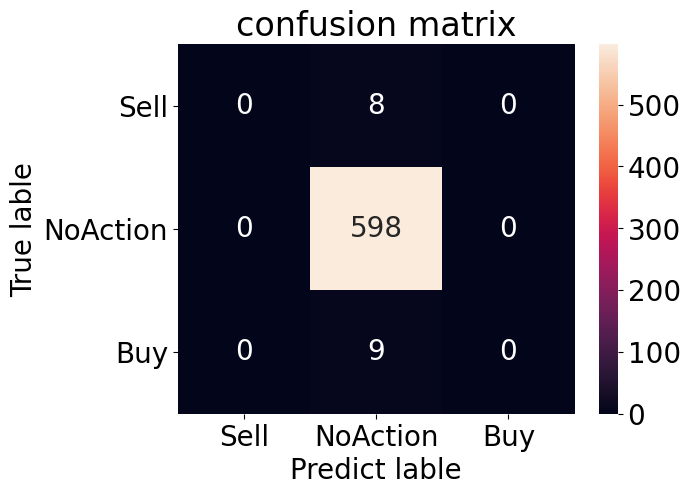

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

labels=["Sell", "NoAction", "Buy"]
sns.heatmap(cm,annot=True ,fmt="d",xticklabels=labels,yticklabels=labels)
plt.title('confusion matrix')  # 标题
plt.xlabel('Predict lable')  # x轴
plt.ylabel('True lable')  # y轴
plt.show()

In [58]:
# 计算每个类别的精度和召回率
from sklearn.metrics import classification_report
target_names = ['Sell', 'No Action', 'Buy']
print(classification_report(y_test.values, y_test_predict, target_names=target_names))

              precision    recall  f1-score   support

        Sell       0.00      0.00      0.00         8
   No Action       0.97      1.00      0.99       598
         Buy       0.00      0.00      0.00         9

    accuracy                           0.97       615
   macro avg       0.32      0.33      0.33       615
weighted avg       0.95      0.97      0.96       615



C:\ProgramData\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# using best parameter to build model

In [59]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor


model = RandomForestClassifier(n_estimators=50,max_features='auto',max_depth=None, n_jobs=-1)
fit = model.fit(X_train,y_train)

In [60]:
# save model 

import pickle
filename = 'stock.pkl'
pickle.dump(model, open(filename, 'wb'))


In [61]:
# load model

filename = 'stock.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

In [62]:
#  model on train set

score = loaded_model.score(X_train, y_train)
print("score", score)

score 0.999593165174939


In [63]:

# model on test set

score = loaded_model.score(X_test, y_test)
print("score", score)

score 0.9723577235772358
